# プロッティング (Plotting)

GWExPy は、`gwpy.plot.Plot` をベースにした強力な可視化機能を提供します。
単一の時系列データから、行列データ (`TimeSeriesMatrix`), スペクトログラムのリスト (`SpectrogramList`) まで、一貫したインターフェースで扱えます。

## 目次
1. [基本的なプロット作成](#basic)
2. [複数データのプロット (マルチパネル)](#multi)
3. [Matrix と Collection のプロット](#matrix)
4. [カスタマイズと保存](#customize)

<a id="basic"></a>
## 1. 基本的なプロット作成

`gwexpy.plot.Plot` クラスは、データの種類に応じて適切な軸ラベル、スケール、レイアウトを自動的に設定します。

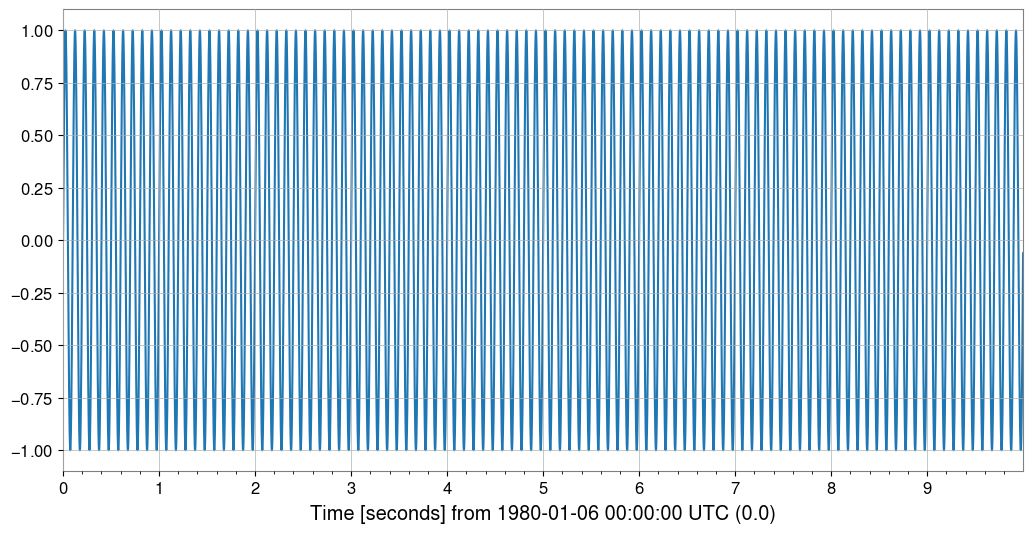

In [1]:
import numpy as np

from gwexpy.noise.wave import sine
from gwexpy.plot import Plot

# データの準備
ts = sine(duration=10, sample_rate=1024, frequency=10, amplitude=1)
ts.name = 'Sine Wave'

# 最もシンプルなプロット
plot = Plot(ts)
plot.show()

<a id="multi"></a>
## 2. 複数データのプロット

複数のデータを渡すと、デフォルトでは同じ軸に重ね描きされます。
`separate=True` を指定すると、それぞれのデータに対して個別のサブプロット (パネル) が作成されます。

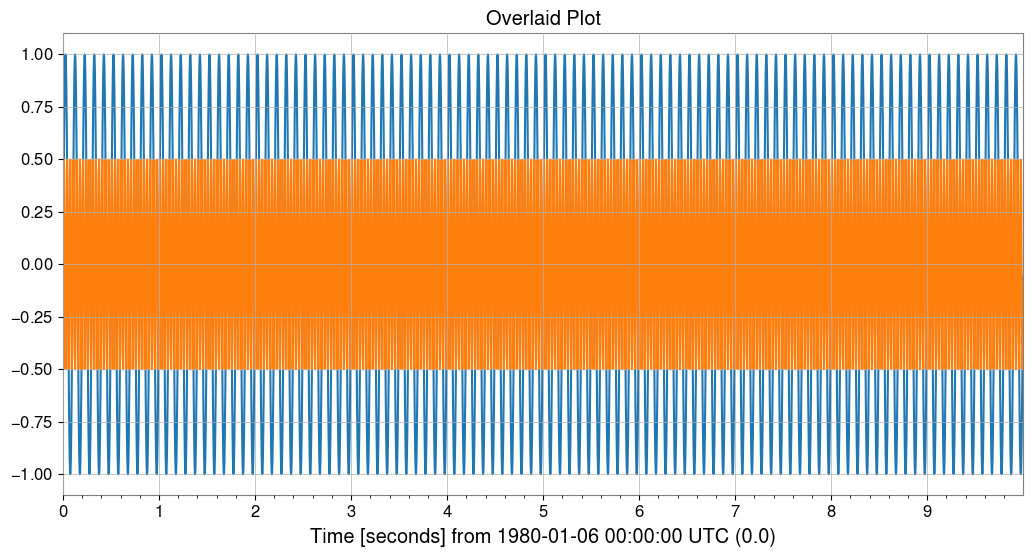

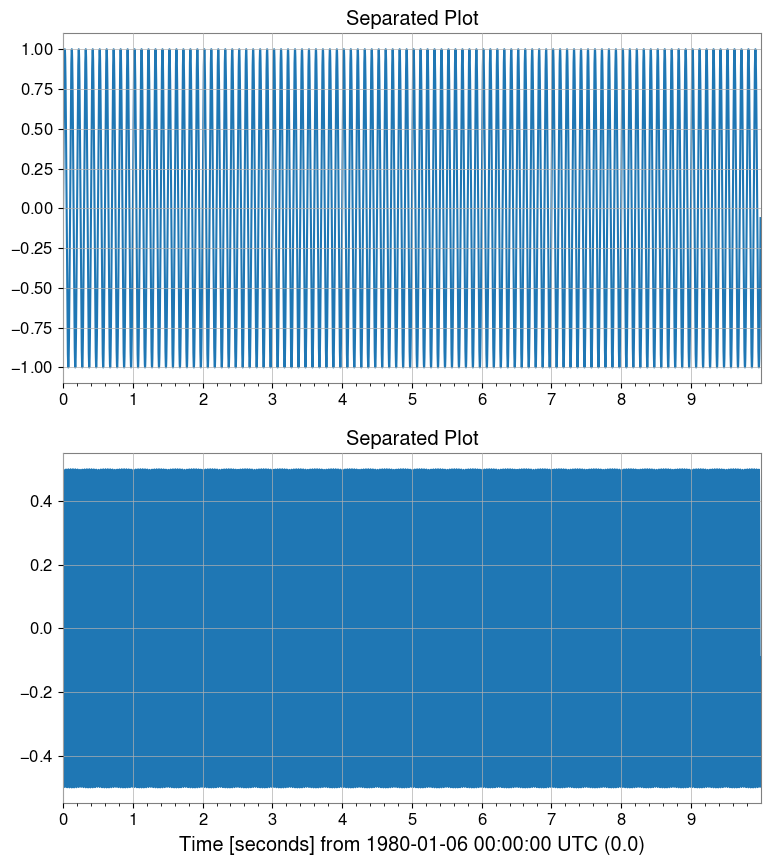

In [2]:
ts2 = sine(duration=10, sample_rate=1024, frequency=30, amplitude=0.5)
ts2.name = 'Higher Freq'

# 重ね描き
plot_overlay = Plot(ts, ts2, title='Overlaid Plot')
plot_overlay.show()

# パネル分割 (separate=True)
# sharex=True でX軸を共有してズーム連動などが可能
plot_sep = Plot(ts, ts2, separate=True, sharex=True, title='Separated Plot')
plot_sep.show()

<a id="matrix"></a>
## 3. Matrix と Collection のプロット

GWExPy の特徴的なデータ構造である `TimeSeriesMatrix` や `SpectrogramList` もそのまま `Plot` に渡すことができます。
自動的にグリッドレイアウトなどが計算され、「いい感じ」に表示されます。

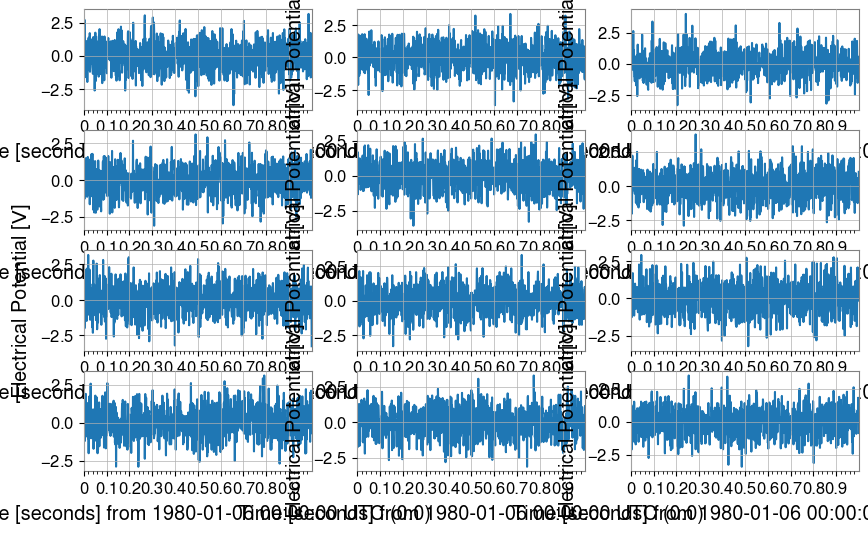

In [3]:
from gwexpy.timeseries import TimeSeriesMatrix

# 3x1024 (3秒分) のデータを 4チャンネル分作成
data = np.random.randn(4, 3, 1024)
ts_matrix = TimeSeriesMatrix(data, sample_rate=1024, unit='V')

# マトリックスのプロット (チャンネルごとに行、時間ステップごとに列)
# figsize は自動調整されますが、指定も可能です
plot_mat = ts_matrix.plot(figsize=(10, 6))
plot_mat.show()

`SpectrogramList` の場合も同様に一括プロットが可能です。

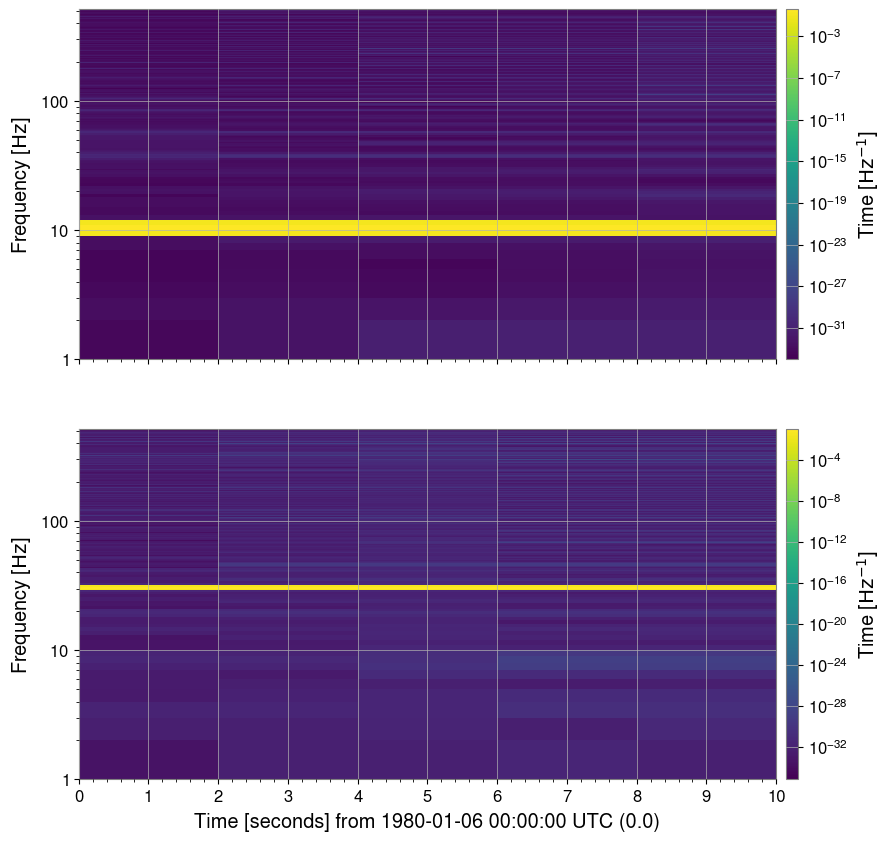

In [4]:
# サンプルスペクトログラム作成
spec1 = ts.spectrogram(stride=2, fftlength=1)
spec2 = ts2.spectrogram(stride=2, fftlength=1)

# リストで渡すだけでマルチパネル化
plot_spec = Plot(spec1, spec2, separate=True, sharex=True, sharey=True, geometry=(2, 1))
plot_spec.show()

<a id="customize"></a>
## 4. カスタマイズと保存

`Plot` オブジェクトは matplotlib の Figure/Axes をラップしているため、高度なカスタマイズが可能です。
また、メソッドチェーンを使って簡潔に記述できます。

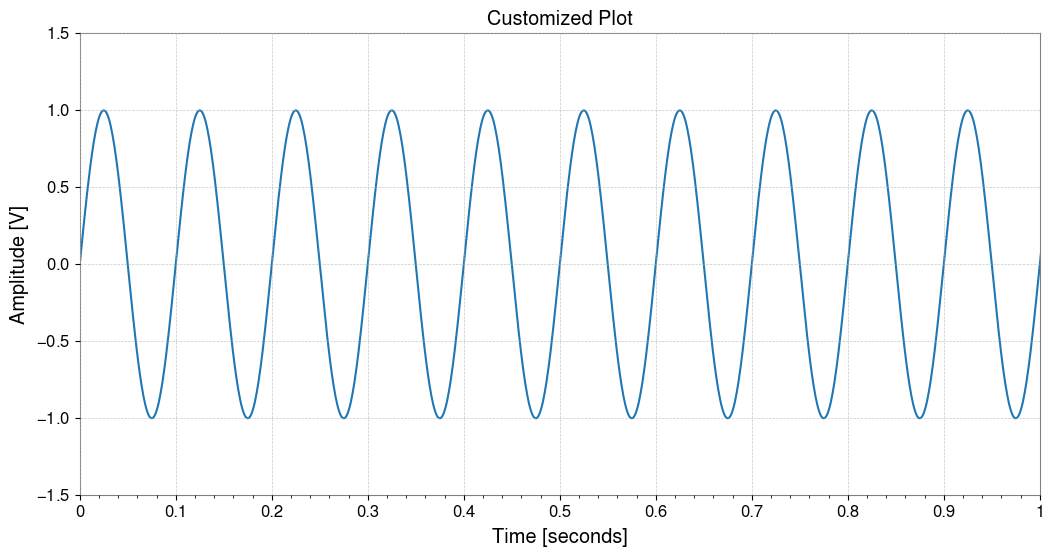

In [5]:
plot = Plot(ts)

# Axesオブジェクトへのアクセス
ax = plot.gca()

# タイトル、ラベル、範囲の設定
ax.set_title("Customized Plot")
ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Amplitude [V]")
ax.set_xlim(0, 1)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, linestyle='--', alpha=0.7)

plot.show()

# 保存
# plot.save("my_plot.png")